In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

In [3]:
mouse = pd.read_csv(mouse_data)
clinical = pd.read_csv(clinical_data)

In [4]:
combined = pd.merge(mouse, clinical, on="Mouse ID")
combined.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
combined = combined[(combined["Drug"] == 'Capomulin') 
                    |(combined["Drug"] == 'Infubinol') 
                    | (combined["Drug"] == 'Ketapril') 
                    | (combined["Drug"] == 'Placebo')]
combined.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


In [6]:
tumor_vol_mean = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"])
tumor_vol_mean = tumor_vol_mean.unstack(0)
tumor_vol_mean

Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589
10                 43.084291  49.403909  49.582269  49.423329
15                 42.064317  51.296397  52.399974  51.359742
20                 40.716325  53.197691  54.920935  54.364417
25                 39.939528  55.715252  57.678982  57.482574
30                 38.769339  58.299397  60.994507  59.809063
35                 37.816839  60.742461  63.371686  62.420615
40                 36.958001  63.162824  66.068580  65.052675
45                 36.236114  65.755562  70.662958  68.084082

In [7]:
tumor_vol_sem = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"])
tumor_vol_sem = tumor_vol_sem.rename(columns ={"Tumor Volume (mm3)": "Standard Error"})
tumor_vol_sem = tumor_vol_sem.unstack(0)
tumor_vol_sem

Standard Error                              
Drug           Capomulin Infubinol  Ketapril   Placebo
Timepoint                                             
0               0.000000  0.000000  0.000000  0.000000
5               0.448593  0.235102  0.264819  0.218091
10              0.702684  0.282346  0.357421  0.402064
15              0.838617  0.357705  0.580268  0.614461
20              0.909731  0.476210  0.726484  0.839609
25              0.881642  0.550315  0.755413  1.034872
30              0.934460  0.631061  0.934121  1.218231
35              1.052241  0.984155  1.127867  1.287481
40              1.223608  1.055220  1.158449  1.370634
45              1.223977  1.144427  1.453186  1.351726

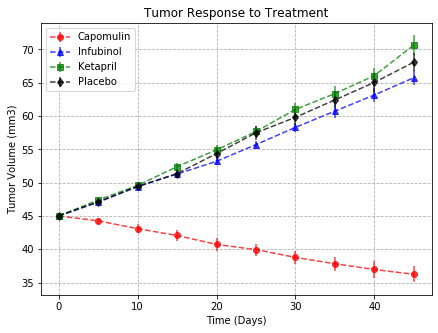

In [8]:
x_axis = np.arange(0, 50, 5)

fig, ax = plt.subplots(figsize=(7,5))

ax.errorbar(x_axis, tumor_vol_mean["Tumor Volume (mm3)"]["Capomulin"], 
                                   yerr=tumor_vol_sem["Standard Error"]["Capomulin"], fmt="--o", color="r",
            alpha=0.75, label="Capomulin")

ax.errorbar(x_axis, tumor_vol_mean["Tumor Volume (mm3)"]["Infubinol"], 
                                   yerr=tumor_vol_sem["Standard Error"]["Infubinol"], fmt="--^", color="b",
            alpha=0.75, label="Infubinol")

ax.errorbar(x_axis, tumor_vol_mean["Tumor Volume (mm3)"]["Ketapril"], 
                                   yerr=tumor_vol_sem["Standard Error"]["Ketapril"], fmt="--s", color="g",
            alpha=0.75, label="Ketapril")

ax.errorbar(x_axis, tumor_vol_mean["Tumor Volume (mm3)"]["Placebo"], 
                                   yerr=tumor_vol_sem["Standard Error"]["Placebo"], fmt="--d", color="0",
            alpha=0.75, label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="dashed")
plt.legend()
plt.show()

In [9]:
meta_mean = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])
meta_mean = meta_mean.unstack(0)
meta_mean

Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727

In [10]:
meta_sem = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])
meta_sem = meta_sem.rename(columns ={"Metastatic Sites": "Standard Error"})
meta_sem = meta_sem.unstack(0)
meta_sem

Standard Error                              
Drug           Capomulin Infubinol  Ketapril   Placebo
Timepoint                                             
0               0.000000  0.000000  0.000000  0.000000
5               0.074833  0.091652  0.098100  0.100947
10              0.125433  0.159364  0.142018  0.115261
15              0.132048  0.194015  0.191381  0.190221
20              0.161621  0.234801  0.236680  0.234064
25              0.181818  0.265753  0.288275  0.263888
30              0.172944  0.227823  0.347467  0.300264
35              0.169496  0.224733  0.361418  0.341412
40              0.175610  0.314466  0.315725  0.297294
45              0.202591  0.309320  0.278722  0.304240

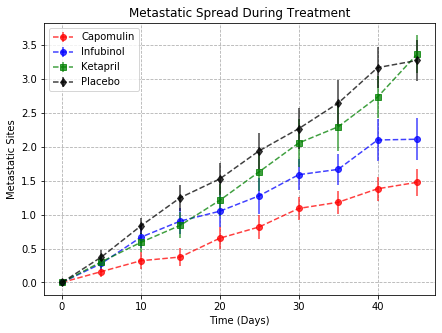

In [11]:
x_axis = np.arange(0, 50, 5)
fig, ax = plt.subplots(figsize=(7,5))

ax.errorbar(x_axis, meta_mean["Metastatic Sites"]["Capomulin"], 
                                   yerr=meta_sem["Standard Error"]["Capomulin"], fmt="--o", color="r",
            alpha=0.75, label="Capomulin")

ax.errorbar(x_axis, meta_mean["Metastatic Sites"]["Infubinol"], 
                                   yerr=meta_sem["Standard Error"]["Infubinol"], fmt="--o", color="b",
            alpha=0.75, label="Infubinol")

ax.errorbar(x_axis, meta_mean["Metastatic Sites"]["Ketapril"], 
                                   yerr=meta_sem["Standard Error"]["Ketapril"], fmt="--s", color="g",
            alpha=0.75, label="Ketapril")

ax.errorbar(x_axis, meta_mean["Metastatic Sites"]["Placebo"], 
                                   yerr=meta_sem["Standard Error"]["Placebo"], fmt="--d", color="0",
            alpha=0.75, label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(linestyle="dashed")
plt.legend()
plt.show()

In [12]:
mice = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).nunique()["Mouse ID"])
mice = mice.rename(columns ={"Mouse ID": "# of Mice"})
mice = mice.unstack(0)
mice

# of Mice                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0                25        25       25      25
5                25        25       23      24
10               25        21       22      24
15               24        21       19      20
20               23        20       19      19
25               22        18       19      17
30               22        17       18      15
35               22        12       17      14
40               21        10       15      12
45               21         9       11      11

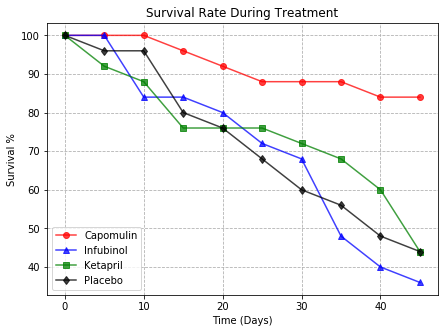

In [13]:
x_axis = np.arange(0, 50, 5)
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(x_axis, mice["# of Mice"]["Capomulin"]/25*100, marker="o" , color="r", alpha=0.75, label="Capomulin")
ax.plot(x_axis, mice["# of Mice"]["Infubinol"]/25*100, marker="^" , color="b", alpha=0.75, label="Infubinol")
ax.plot(x_axis, mice["# of Mice"]["Ketapril"]/25*100, marker="s" , color="g", alpha=0.75, label="Ketapril")
ax.plot(x_axis, mice["# of Mice"]["Placebo"]/25*100, marker="d" , color="0", alpha=0.75, label="Placebo")

plt.title("Survival Rate During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival %")
plt.grid(linestyle="dashed")
plt.legend()
plt.show()

In [14]:
tumor_vol_change = (tumor_vol_mean.loc[45, :]-tumor_vol_mean.loc[0, :])/tumor_vol_mean.loc[0, :] * 100
tumor_vol_change

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Placebo      51.297960
dtype: float64

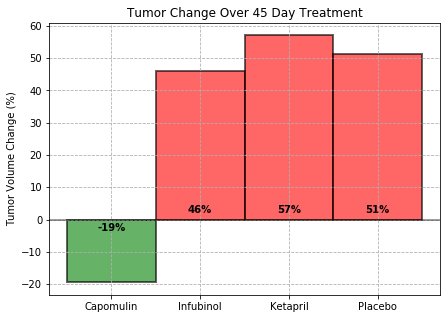

In [15]:
x_axis = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
fig, ax = plt.subplots(figsize=(7,5))

dynamic_color=[]

for x in  tumor_vol_change:
    if x <0:
        dynamic_color.append("g")
    else:
        dynamic_color.append("r")
        

plt.bar(x_axis, tumor_vol_change,width=1, color=dynamic_color, alpha=0.6,edgecolor="black", linewidth=2)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")
plt.grid(linestyle="dashed")
plt.axhline(y=0,color="black", alpha=0.5)

count = 0

for x in tumor_vol_change:
    if x < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(x)) + "%", ha = "center", color = "black", weight="bold")
    count += 1
  
plt.show()